## Librerias que serán utilizadas

In [1]:
# Procesado y tratamiento de los datos
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Balanceo del dataset
from imblearn.over_sampling import RandomOverSampler

# División del dataset
from sklearn.model_selection import train_test_split

# Búsqueda de los mejores parámetros
from sklearn.model_selection import GridSearchCV

# Modelos utilizados 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Métricas de evaluación
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Otros
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Lectura del dataset 
data = pd.read_json('https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Danone+Hackathon+Mexico/data/train_products.json', orient='index')
# Visualización inicial del conjunto de datos
data.head(10)

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,"[en:frozen-foods, en:frozen-fried-potatoes, en...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:potato', 'percent': 82, 'percent_e...",1,unknown,...,b,[en:plastic],1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,"[en:snacks, en:desserts, en:sweet-snacks, en:f...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:glucose-syrup', 'percent_estimate'...",10,unknown,...,e,"[en:cardboard, en:plastic]",1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:austria, en:france, en:germany, en:spain, ...",{'en:unknown': 100},"[{'id': 'en:whole-wheat-flour', 'percent': 37,...",3,0.635,...,d,"[en:paperboard, en:plastic]",1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,"[en:dairies, en:fermented-foods, en:fermented-...",0,[en:italy],{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:chee...",2,unknown,...,e,[en:plastic],1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,"[en:plant-based-foods-and-beverages, en:plant-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:turmeric', 'percent_estimate': 55....",0,unknown,...,unknown,"[en:glass, en:plastic, en:unknown]",0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4
5,Extra Fin Noir Croustillant,"Côte d'Or,Mondelez",unknown,"[en:snacks, en:sweet-snacks, en:cocoa-and-its-...",0,[en:france],{'en:unknown': 100},"[{'id': 'en:sugar', 'percent_estimate': 50, 'r...",2,unknown,...,e,[en:cardboard],0,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,3
6,Mayonnaise,"Winiary,Nestlé",,"[en:condiments, en:sauces, en:mayonnaises, en:...",0,"[en:france, en:poland, en:united-states]",{'en:unknown': 100},"[{'from_palm_oil': 'no', 'id': 'en:rapeseed-oi...",2,0,...,d,[en:unknown],1,1.965186,0.006688,0.039628,0.240192,0.391958,0.366225,3
7,Dés de saumon fumé,Carrefour,unknown,"[en:seafood, en:fishes, en:fatty-fishes, en:sa...",0,[en:france],"{'en:ireland': 50, 'en:norway': 50}","[{'has_sub_ingredients': 'yes', 'id': 'en:atla...",0,unknown,...,d,"[en:cardboard, en:plastic]",0,6.901839,0.006688,0.022329,0.521356,0.310197,1.003897,3
8,Pomme Mangue Sans sucres ajoutés*,"Carrefour Bio,Carrefour",unknown,"[en:plant-based-foods-and-beverages, en:plant-...",0,"[en:france, en:italy, en:spain]",{'en:european-union': 100},"[{'id': 'en:apple-puree', 'labels': 'en:organi...",2,unknown,...,a,[en:plastic],1,0.119076,0.006688,0.037393,0.277614,0.188463,0.216012,1
9,Filets de Hareng Ronde des Mers Doux sachet,"Ronde des Mers,Marque Repère, Pêche Océan",unknown,"[en:seafood, en:fishes, en:fatty-fishes, en:fi...",0,[en:france],"{'en:faroe-islands': 50, 'en:iceland': 50}","[{'has_sub_ingredients': 'yes', 'id': 'en:herr...",0,unknown,...,d,[en:plastic],1,1.083211,0.006688,0.023911,0.169777,0.000000,0.905557,1


In [3]:
# Eliminación de algunas columnas
data_new = data.drop(['categories_hierarchy','selling_countries','ingredient_origins','ingredients','packaging_materials', 
                      'calcium_100g','carbohydrates_100g','energy_kcal_100g','fat_100g','fiber_100g','proteins_100g',
                      'salt_100g','sodium_100g','sugars_100g'], axis=1)
# Vizualizamos los cambios aplicados
data_new.head(10)

,name,brand,generic_name,is_beverage,additives_count,nutrition_grade,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,0,1,b,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,0,10,e,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,0,3,d,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,0,2,e,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,0,0,unknown,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4
5,Extra Fin Noir Croustillant,"Côte d'Or,Mondelez",unknown,0,2,e,0,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,3
6,Mayonnaise,"Winiary,Nestlé",,0,2,d,1,1.965186,0.006688,0.039628,0.240192,0.391958,0.366225,3
7,Dés de saumon fumé,Carrefour,unknown,0,0,d,0,6.901839,0.006688,0.022329,0.521356,0.310197,1.003897,3
8,Pomme Mangue Sans sucres ajoutés*,"Carrefour Bio,Carrefour",unknown,0,2,a,1,0.119076,0.006688,0.037393,0.277614,0.188463,0.216012,1
9,Filets de Hareng Ronde des Mers Doux sachet,"Ronde des Mers,Marque Repère, Pêche Océan",unknown,0,0,d,1,1.083211,0.006688,0.023911,0.169777,0.000000,0.905557,1


In [4]:
# Visualizamos la información básica del conjunto de datos
# Indica el número de filas del dataset
# Muestra el número de datos No Nulos por columna (valores validos)
# Tipo de dato de cada columna
# Tamaño total del dataset
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20835 entries, 0 to 20834
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   name                                                  20835 non-null  object 
 1   brand                                                 20835 non-null  object 
 2   generic_name                                          20835 non-null  object 
 3   is_beverage                                           20835 non-null  int64  
 4   additives_count                                       20835 non-null  object 
 5   nutrition_grade                                       20835 non-null  object 
 6   non_recyclable_and_non_biodegradable_materials_count  20835 non-null  int64  
 7   est_co2_agriculture                                   20835 non-null  float64
 8   est_co2_consumption                                   20

In [5]:
# Validación de datos duplicados
data_new.duplicated().sum()

812

In [6]:
# Eliminación de valores duplicados
data_new2 = data_new.drop_duplicates()
# Reseteamos el index de la filas
data_new2.reset_index(drop=True, inplace=True)
# Vizualizamos los cambios aplicados
data_new2

,name,brand,generic_name,is_beverage,additives_count,nutrition_grade,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation,ecoscore_grade
0,Pommes duchesse,"Pom lisse,Pom'Lisse, Marque Repère",unknown,0,1,b,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,Bûche pâtissière à la crème au beurre,"Esprit de Fête,Carrefour",unknown,0,10,e,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,Cini Minis,"Nestlé, Nestlé",,0,3,d,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,Cuor di fette Carrefour,Carrefour,unknown,0,2,e,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,Curry,"Carrefour,Groupe Carrefour",unknown,0,0,unknown,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20018,jus de pommes,Carrefour,unknown,1,0,unknown,1,0.124785,0.000000,0.015377,0.100104,0.116079,0.145580,1
20019,Cafe soluble tueste natural,Eroski,unknown,1,unknown,unknown,1,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216,4
20020,Cioccolato fondente con nocciole intere,Carrefour,unknown,0,unknown,d,1,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,4
20021,BEURRE MOULÉ DE Bretagne Demi sel,Carrefour,unknown,0,0,e,1,7.304731,0.006688,0.039033,0.180553,0.056470,0.233556,3


In [7]:
# Dimensiones del dataset
# Muestra la cantidad de datos y el número de columnas que posee el dataset
data_new2.shape

(20023, 14)

In [8]:
# Eliminación de algunas columnas
data_new3 = data_new2.drop(['name','brand','generic_name','additives_count','nutrition_grade'], axis=1)

In [9]:
# Renombramos cada columna
data_new3.rename(columns={'is_beverage':'Es_Bebida','non_recyclable_and_non_biodegradable_materials_count':'Tipo_Material',
                          'est_co2_agriculture':'Co2_Agricultura','est_co2_consumption':'Co2_Consumo',
                          'est_co2_distribution':'Co2_Distribución','est_co2_packaging':'Co2_Empaquetado',
                          'est_co2_processing':'Co2_Procesamiento','est_co2_transportation':'Co2_Transporte',
                          'ecoscore_grade':'Puntuación'}, inplace=True)
# Vizualizamos los cambios aplicados
data_new3

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte,Puntuación
0,0,1,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651,2
1,0,1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567,3
2,0,1,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874,3
3,0,1,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118,3
4,0,0,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988,4
...,...,...,...,...,...,...,...,...,...
20018,1,1,0.124785,0.000000,0.015377,0.100104,0.116079,0.145580,1
20019,1,1,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216,4
20020,0,1,1.463891,0.000000,0.017321,0.104294,15.259235,0.265547,4
20021,0,1,7.304731,0.006688,0.039033,0.180553,0.056470,0.233556,3


In [10]:
# Número de datos ausentes por variable
print(data_new3.isnull().sum())

Es_Bebida            0
Tipo_Material        0
Co2_Agricultura      0
Co2_Consumo          0
Co2_Distribución     0
Co2_Empaquetado      0
Co2_Procesamiento    0
Co2_Transporte       0
Puntuación           0
dtype: int64


In [11]:
# Comprobación de la existencia de valores infinitos
is_inf = data_new3.isin([np.inf, -np.inf]).any()
is_inf[is_inf]

Series([], dtype: bool)

In [12]:
# Visualización de la información estadística del conjunto de datos
# Para las variables numéricas
data_new3.describe()

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte,Puntuación
count,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000,20023.000000
mean,0.135644,0.734505,2.763334,0.019407,0.028481,0.257235,1.071764,0.250068,2.131948
std,0.342419,0.461300,3.676017,0.063742,0.017077,0.433363,2.688725,0.203152,1.222385
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002275,0.000000
25%,0.000000,0.000000,0.728181,0.000000,0.017321,0.110188,0.150109,0.183838,1.000000
50%,0.000000,1.000000,1.530274,0.006688,0.022631,0.193055,0.250586,0.211504,2.000000
75%,0.000000,1.000000,3.977171,0.010931,0.037393,0.281544,0.636085,0.266267,3.000000
max,1.000000,4.000000,51.221154,1.285926,0.205742,9.769783,19.052315,7.799588,4.000000


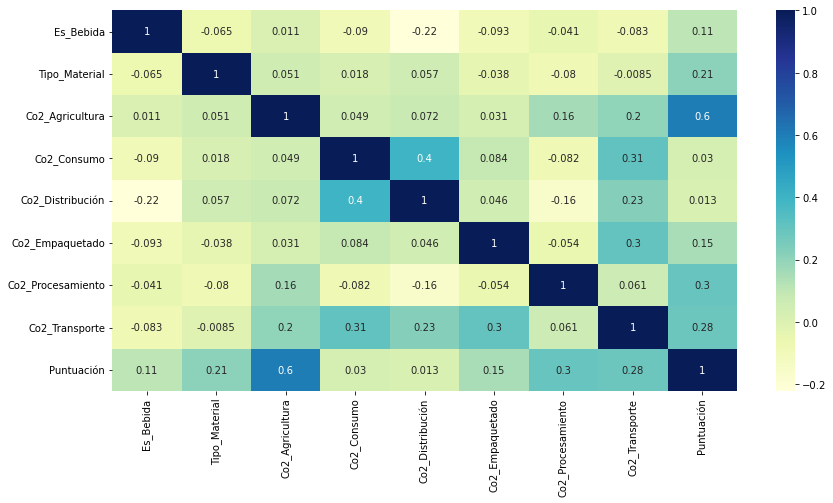

In [13]:
# Validamos correlaciones
correlation = data_new3.corr()
fig = plt.figure (figsize = (14,7))
ax = fig.add_subplot(111)
data_new.plot = sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show() 

In [14]:
# Verificamos cuales son las variables que poseen mas correlación con respecto a la variable de salida
data_new3.corr()['Puntuación'].sort_values()

Co2_Distribución     0.013282
Co2_Consumo          0.030373
Es_Bebida            0.106154
Co2_Empaquetado      0.148605
Tipo_Material        0.210045
Co2_Transporte       0.280371
Co2_Procesamiento    0.297976
Co2_Agricultura      0.601744
Puntuación           1.000000
Name: Puntuación, dtype: float64

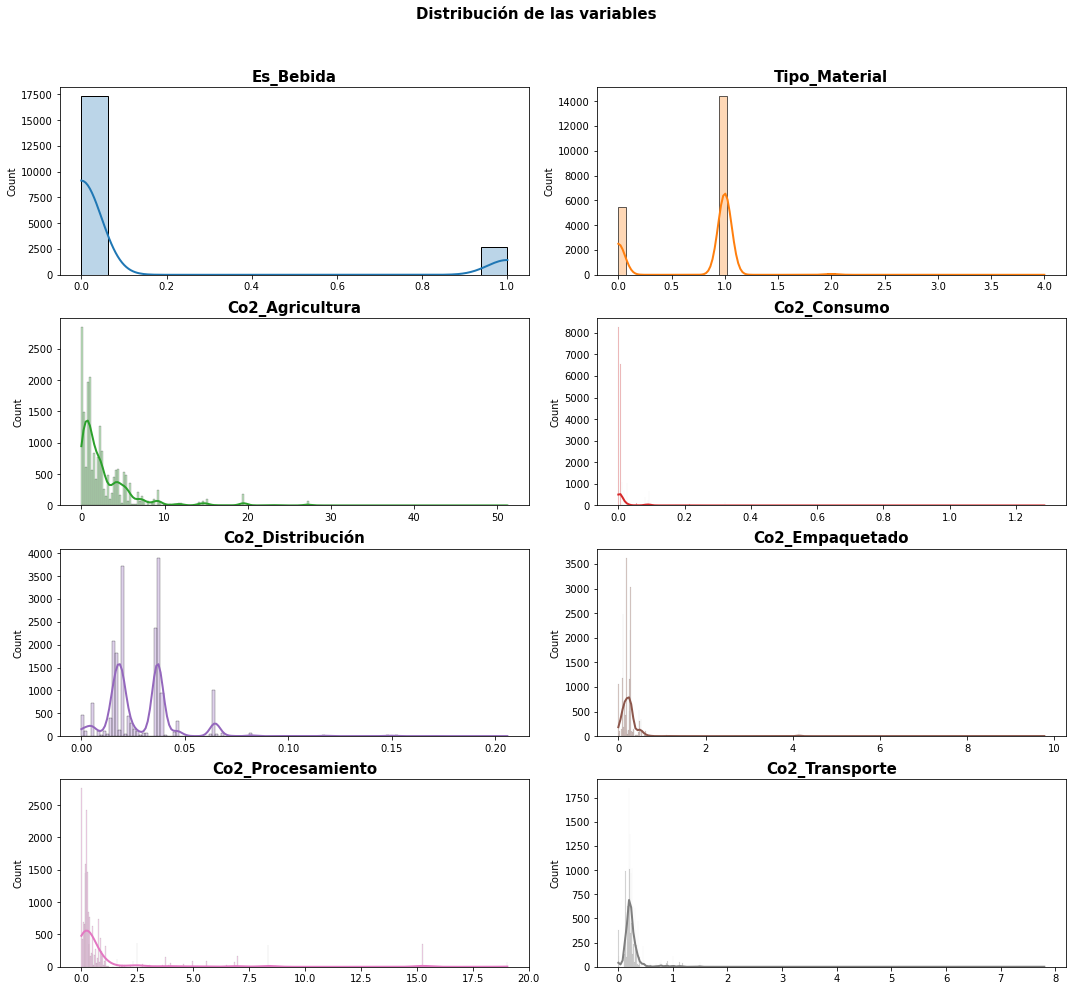

In [15]:
# Gráficas de distribución para cada variable numérica
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,14))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = data_new3.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('Puntuación')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna 
    sns.histplot(
        data    = data_new3,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*4)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución de las variables', fontsize = 15, fontweight = "bold");

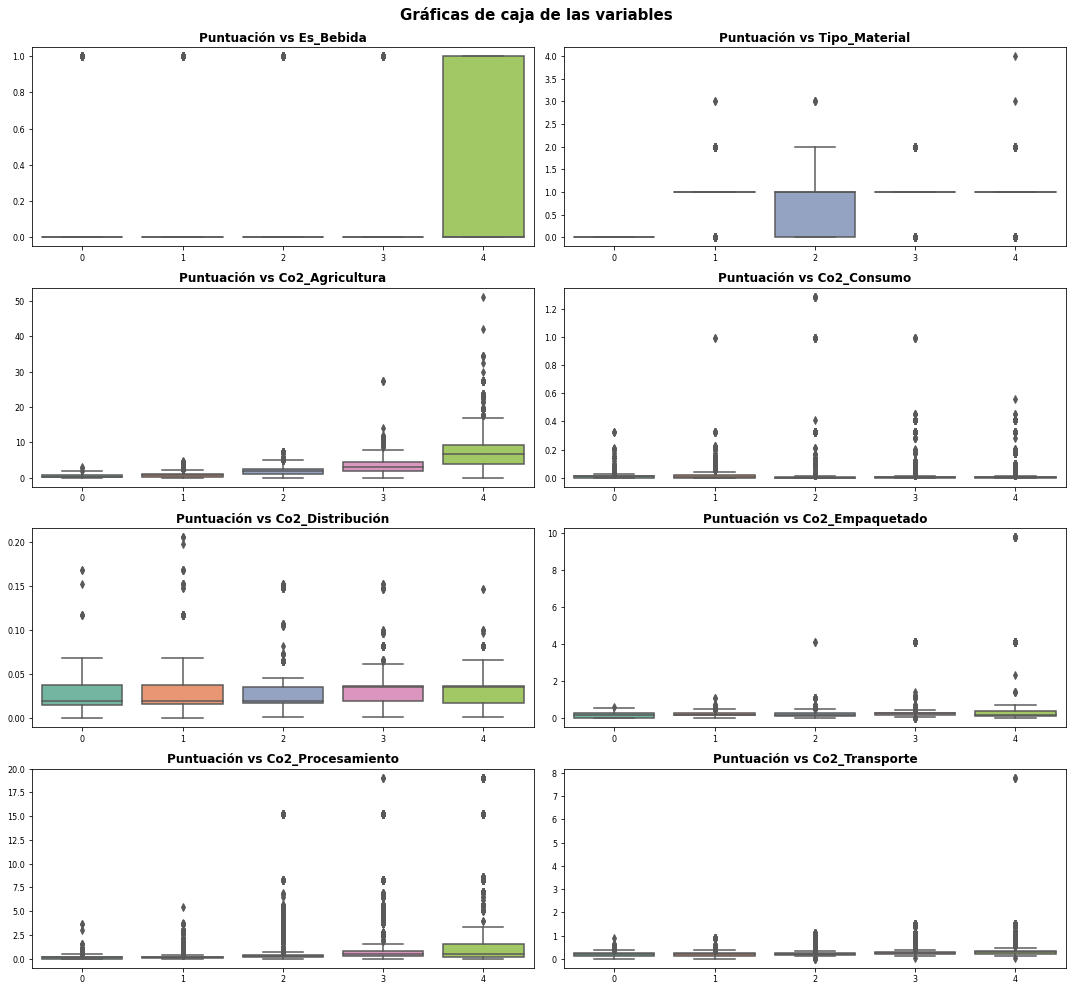

In [16]:
# Gráficas de caja de cada variable según la variable de salida
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,14))
axes = axes.flat
# Seleccionamos el tipo de variable a gráficar
columnas_numeric = data_new3.select_dtypes(include=['float64', 'int']).columns
# Se elimina la variable de salida
columnas_numeric = columnas_numeric.drop('Puntuación')
# Recorremos cada columna seleccionada 
for i, colum in enumerate(columnas_numeric):
    # Gráficamos cada columna
    sns.boxplot(
        x     = 'Puntuación',
        y     = colum,
        data  = data_new3,
        color = sns.set_palette("Set2"),
        ax    = axes[i]
    )
    axes[i].set_title(f"Puntuación vs {colum}", fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.94)
fig.suptitle('Gráficas de caja de las variables', fontsize = 15, fontweight = "bold");

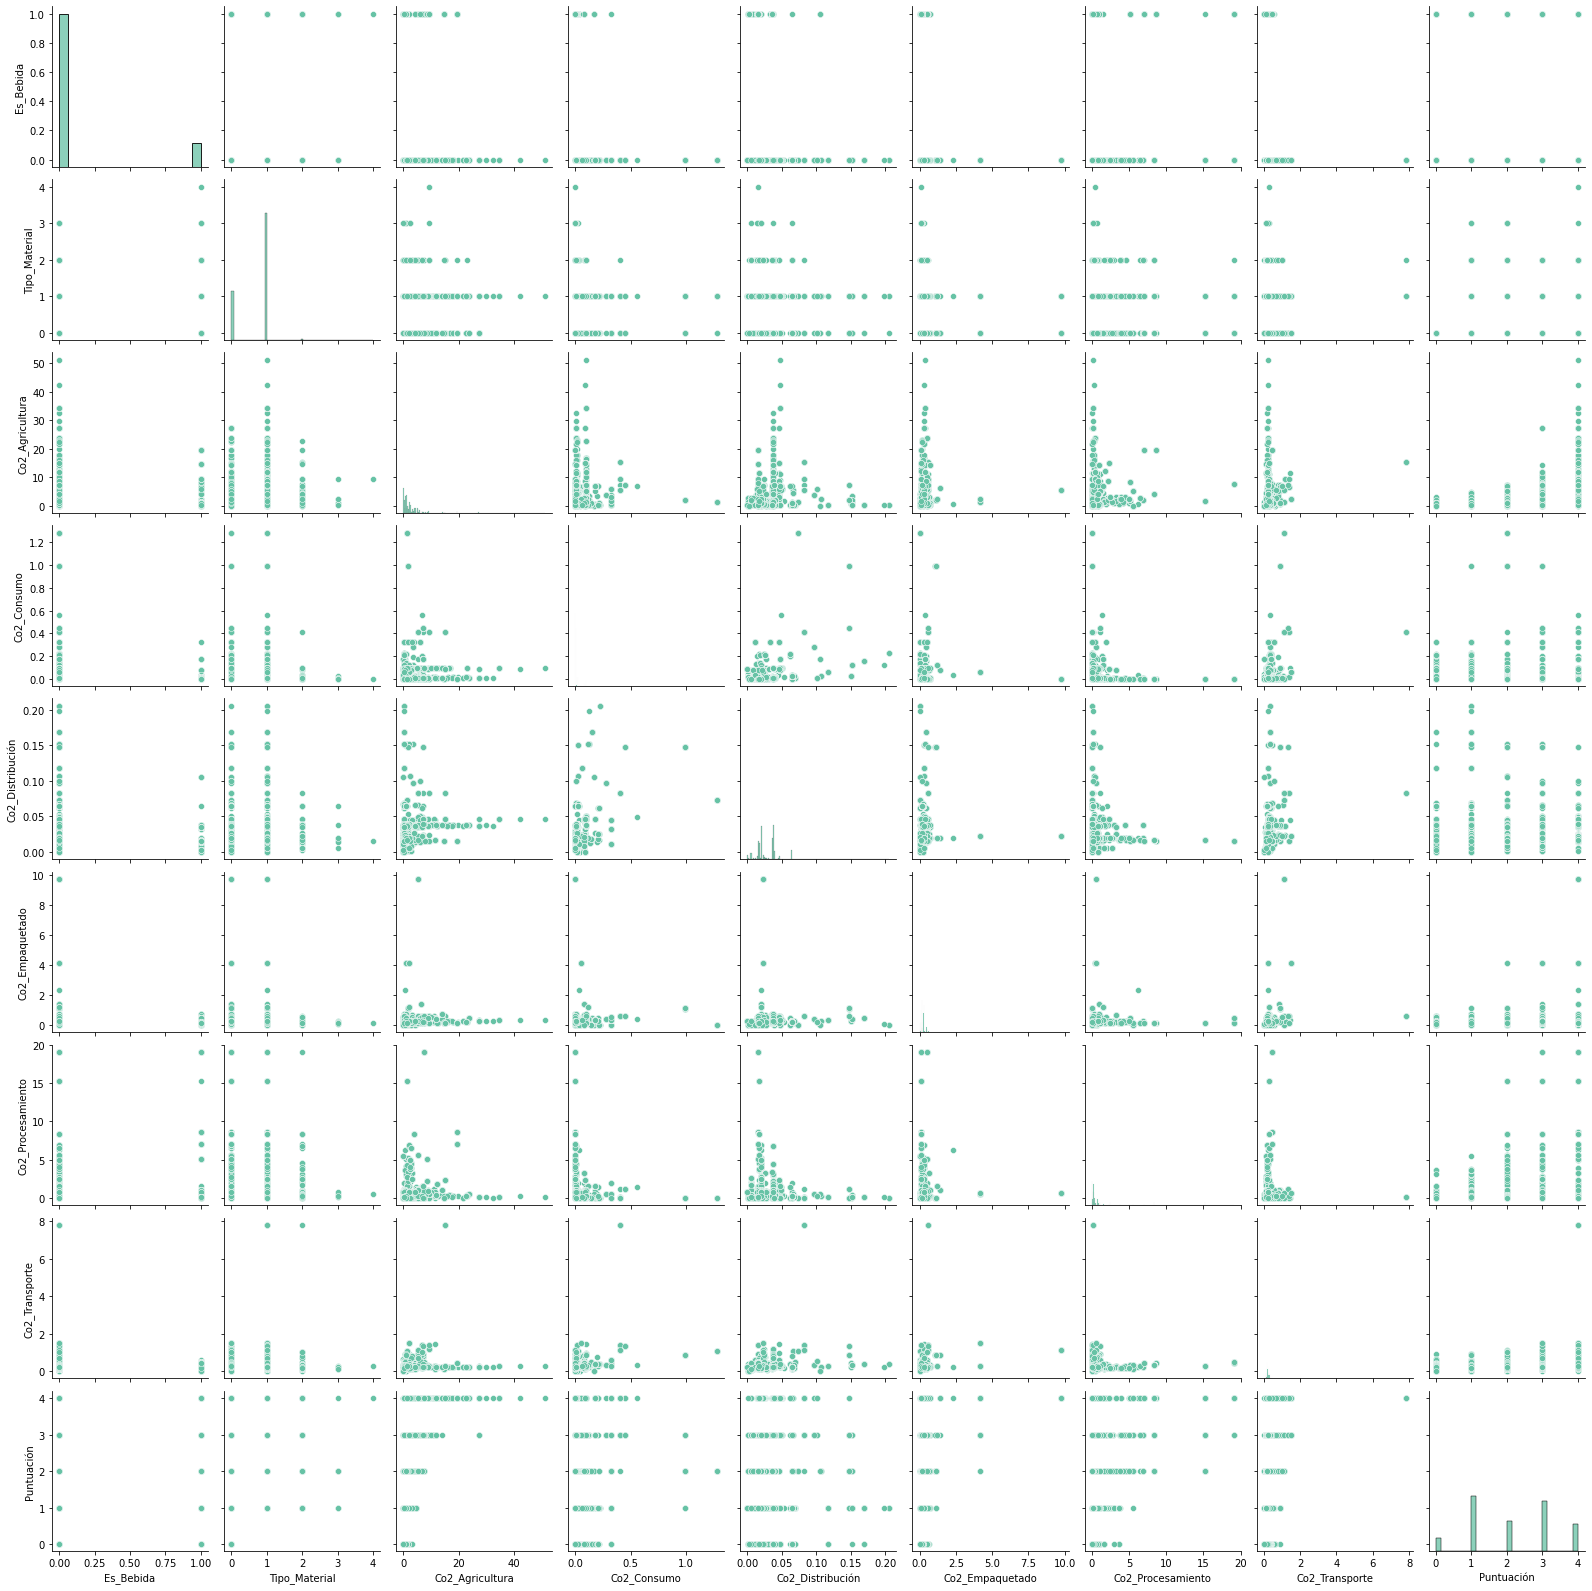

In [17]:
sns.pairplot(data_new3)

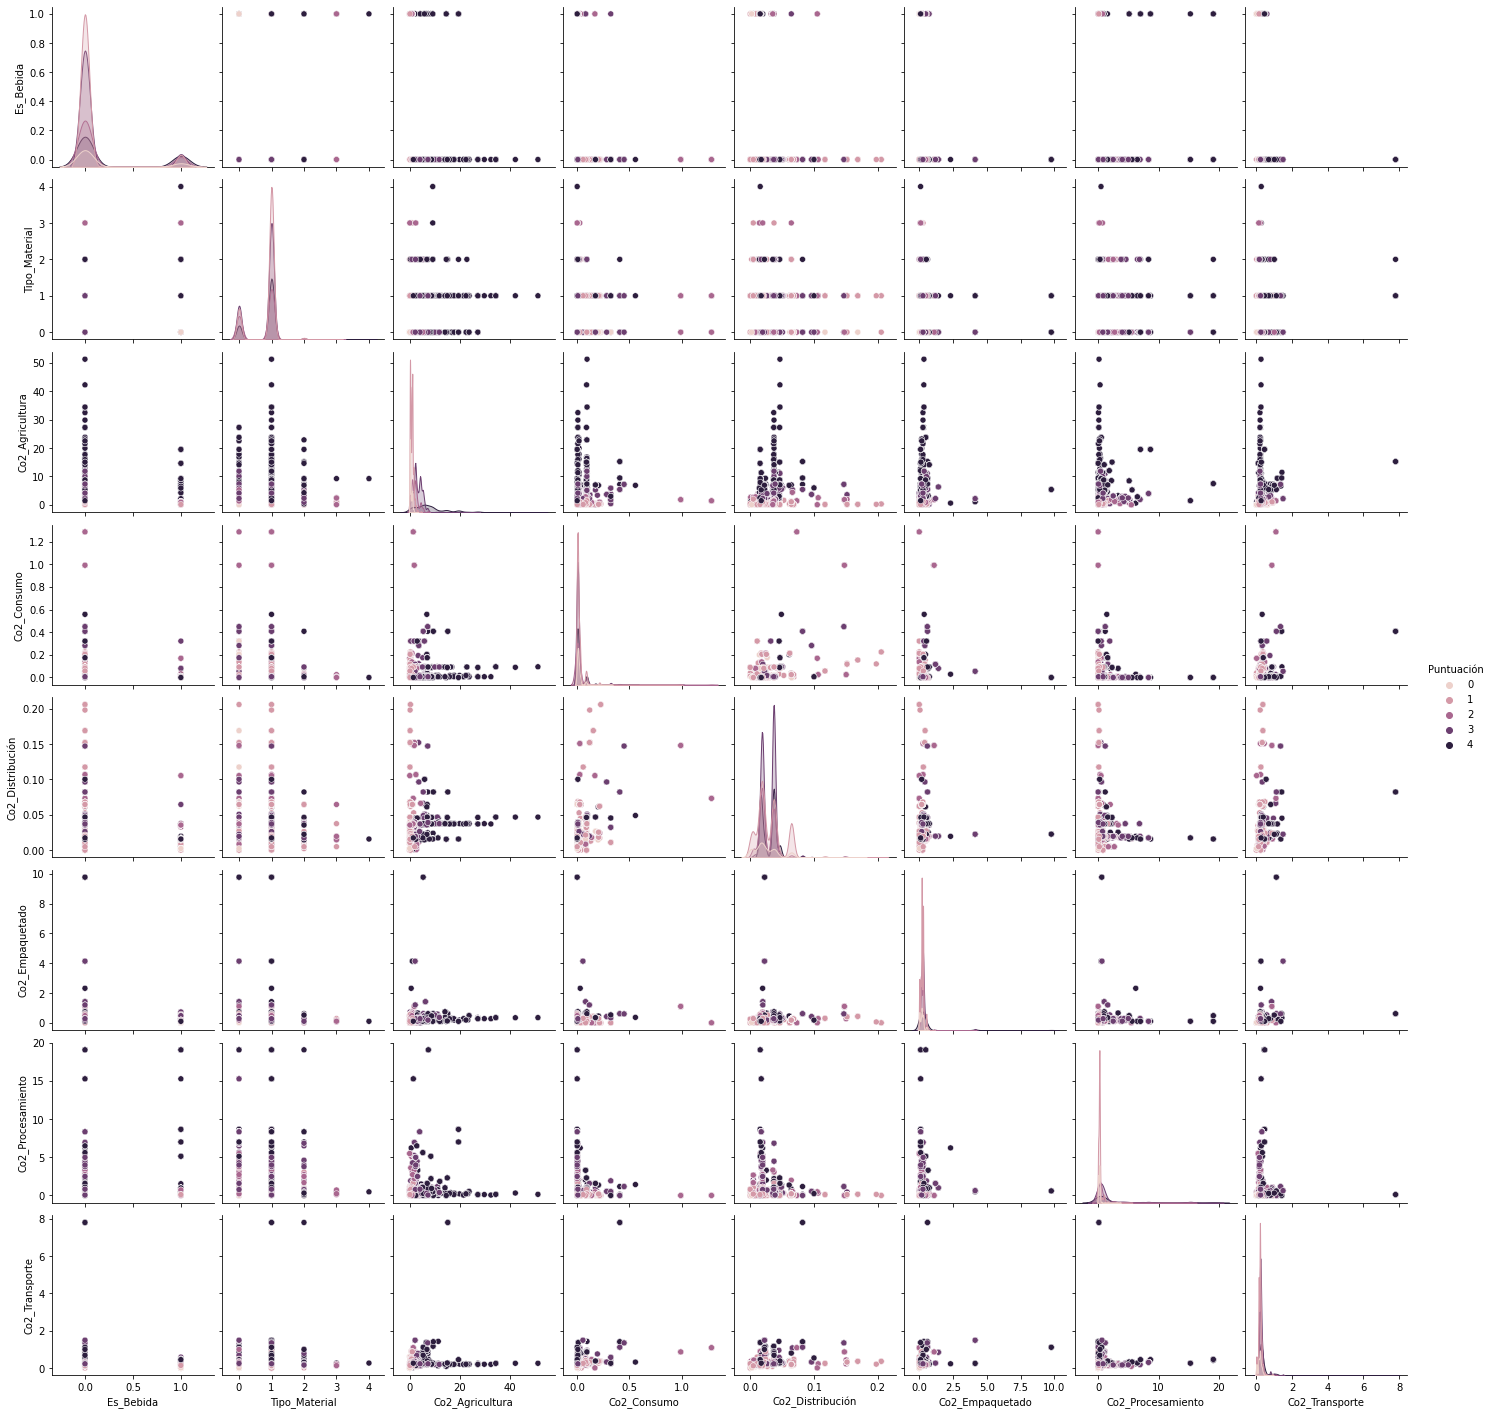

In [18]:
sns.pairplot(data_new3, hue="Puntuación")

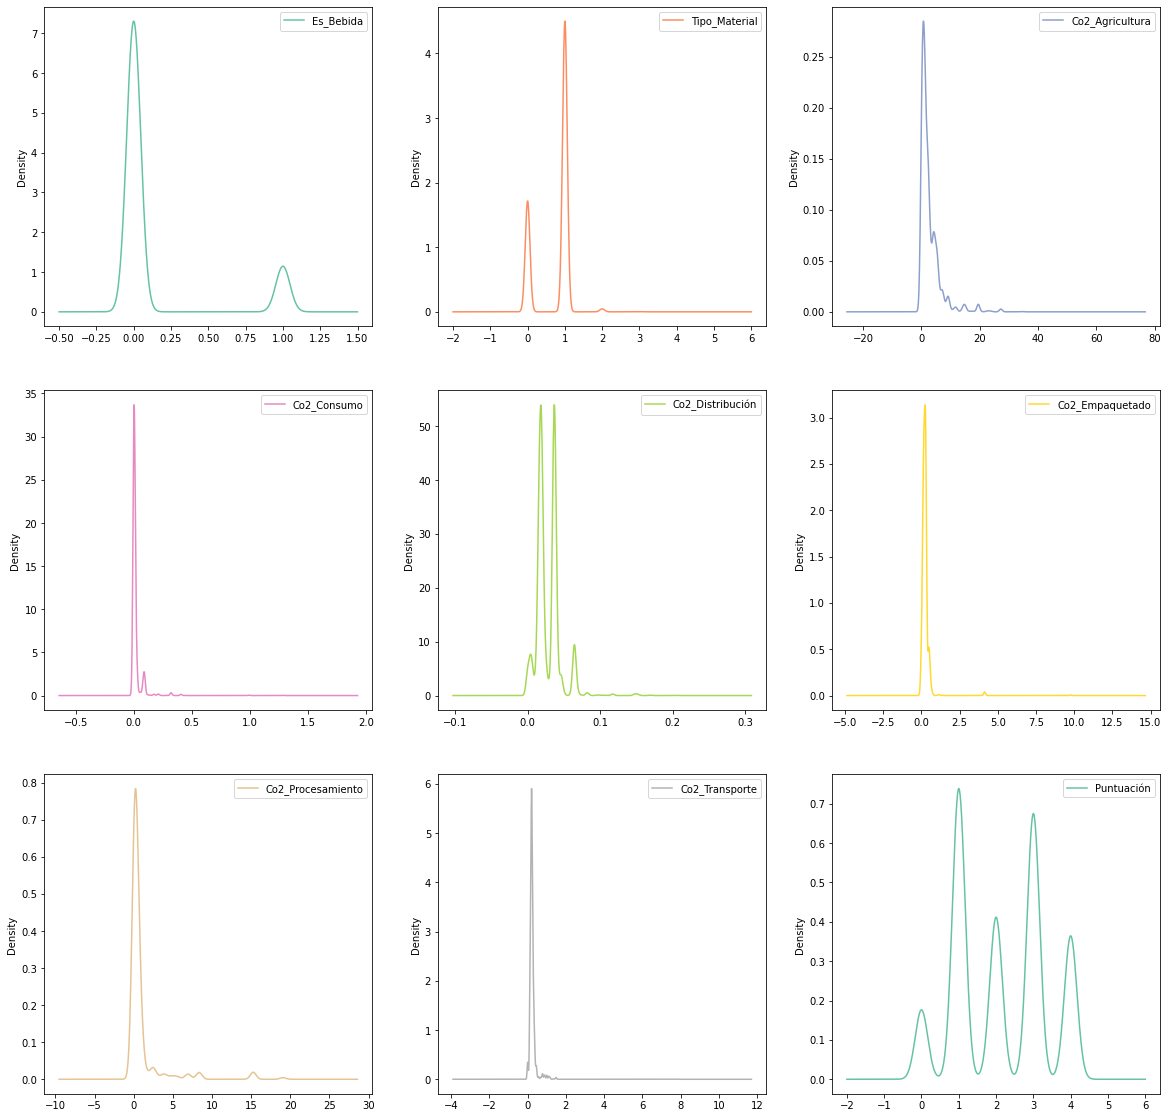

In [19]:
fig = plt.figure (figsize = (20,20))
ax = fig.gca()
den=pd.DataFrame(data_new3)
den.plot(ax =ax, kind='density', subplots = True, layout =(3,3), sharex = False)
plt.show()

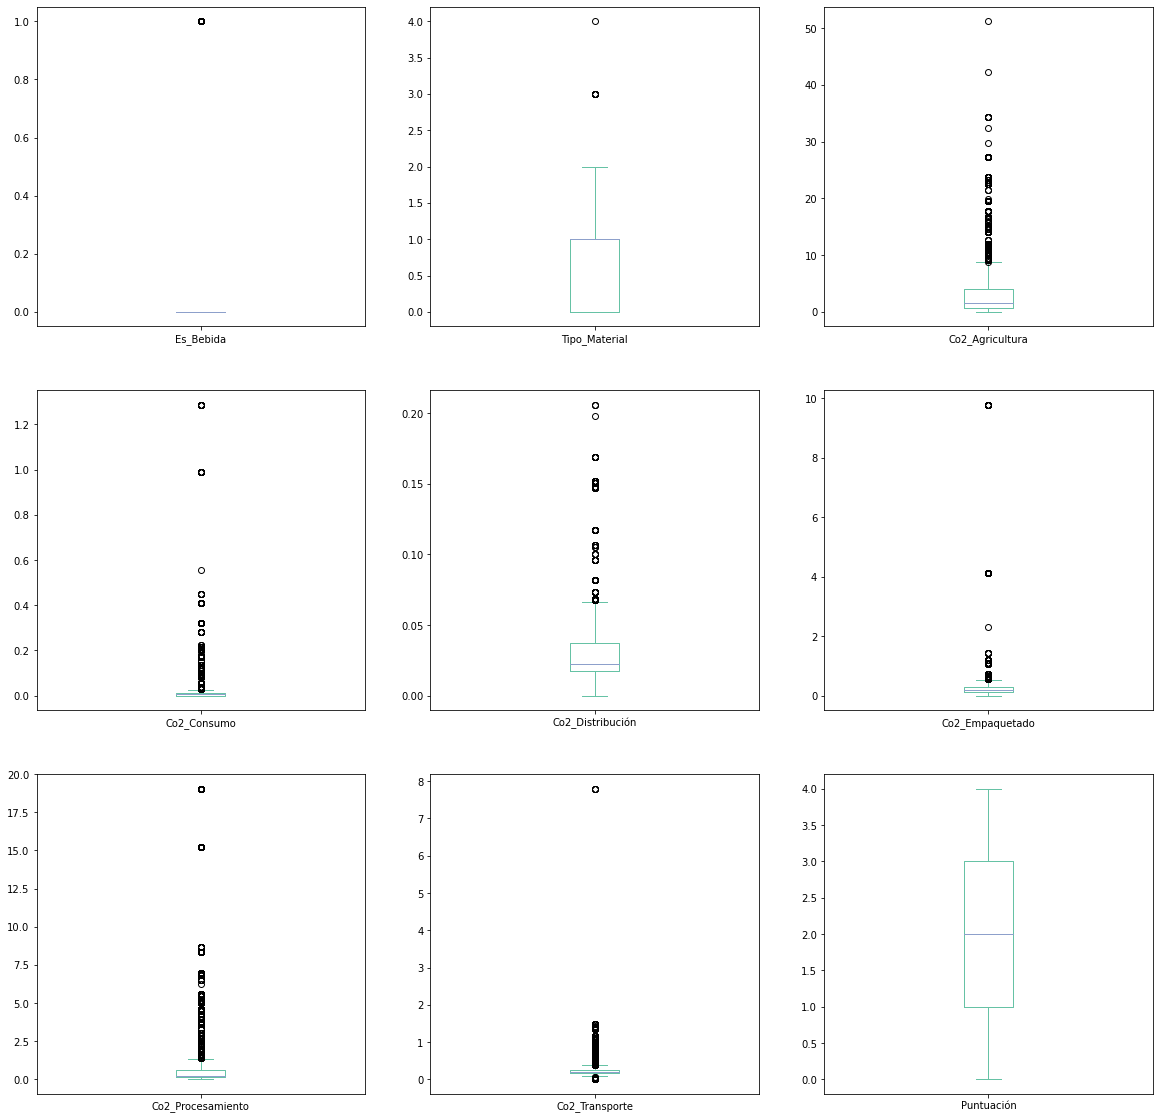

In [20]:
fig = plt.figure( figsize=(20,20))
ax = fig.gca()
data_new3.plot(ax = ax, kind='box', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [21]:
# Del conjunto de datos general separamos la variable de salida del resto de datos.
X_df = data_new3.drop("Puntuación", axis=1)
y_df = data_new3["Puntuación"].copy()

In [22]:
# Validación de la cantidad de ejemplos que posee el dataset según la variable de salida.
data_new3["Puntuación"].value_counts()

1    6250
3    5712
2    3485
4    3083
0    1493
Name: Puntuación, dtype: int64

In [23]:
# Balanceo del dataset
# Inicializamos el método de sobremuestreo
Ros = RandomOverSampler()
# Este método duplica las muestras de la clase menos representada
X_Ros, y_Ros = Ros.fit_resample(X_df, y_df)

In [24]:
# Separamos las columnas para el proceso de trasnformación
colum_scal = X_Ros[["Co2_Agricultura","Co2_Consumo","Co2_Distribución","Co2_Empaquetado","Co2_Procesamiento","Co2_Transporte"]]
# Visualizamos los cambios aplicados
colum_scal

,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,1.405794,0.122097,0.151978,0.400866,0.123400,0.344651
1,1.772009,0.000000,0.019531,0.288156,5.215055,0.171567
2,2.239600,0.000000,0.019531,0.281596,0.770511,0.252874
3,4.536405,0.006688,0.037393,0.185784,0.458632,0.217118
4,7.918371,0.000000,0.015709,0.478390,0.445327,0.334988
...,...,...,...,...,...,...
31245,5.255155,0.000000,0.017321,0.104294,5.609306,0.332368
31246,19.495674,0.000000,0.015709,0.100104,6.998544,0.456216
31247,16.782040,0.092757,0.037393,0.277662,0.322572,0.212257
31248,5.415570,0.006688,0.036974,0.275642,0.000000,0.905557


In [25]:
# Seleccionamos los datos que serán transformados
variables = pd.DataFrame(colum_scal)
# Inicializamos el método de transformación
pt = PowerTransformer(method='yeo-johnson', standardize=True)
# Pasamos las varibles que serán transformadas
skl_yeojohnson = pt.fit(variables)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(variables)
# Transformamos a un DataFrame de Pandas
X_transform = pd.DataFrame(skl_yeojohnson, columns=colum_scal.columns, index=colum_scal.index)
# Visualizamos los cambios aplicados
X_transform

,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,-0.035915,2.327250,3.238042,1.203044,-0.679128,0.960171
1,0.166120,-0.887126,-0.436207,0.624594,2.008496,-0.461137
2,0.374407,-0.887126,-0.436207,0.584923,0.963271,0.311240
3,0.991379,-0.066990,0.741768,-0.092346,0.435864,-0.001282
4,1.431182,-0.887126,-0.749103,1.510435,0.405624,0.900663
...,...,...,...,...,...,...
31245,1.112838,-0.887126,-0.614080,-0.852566,2.019590,0.884211
31246,2.010096,-0.887126,-0.749103,-0.897456,2.046610,1.531859
31247,1.925559,2.281845,0.741768,0.560766,0.082828,-0.046860
31248,1.137235,-0.066990,0.718741,0.548258,-1.391861,2.651674


In [26]:
# Pasar las características transformadas al dataset original
data_clean = X_Ros.drop(["Co2_Agricultura","Co2_Consumo","Co2_Distribución","Co2_Empaquetado","Co2_Procesamiento","Co2_Transporte"], axis=1)
# Visualizamos los cambios aplicados
data_clean

,Es_Bebida,Tipo_Material
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
31245,0,1
31246,1,1
31247,0,1
31248,0,1


In [27]:
# Concatenamos los nuevos datasets
data_clean2 = pd.concat([data_clean, X_transform], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean2 

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,0,1,-0.035915,2.327250,3.238042,1.203044,-0.679128,0.960171
1,0,1,0.166120,-0.887126,-0.436207,0.624594,2.008496,-0.461137
2,0,1,0.374407,-0.887126,-0.436207,0.584923,0.963271,0.311240
3,0,1,0.991379,-0.066990,0.741768,-0.092346,0.435864,-0.001282
4,0,0,1.431182,-0.887126,-0.749103,1.510435,0.405624,0.900663
...,...,...,...,...,...,...,...,...
31245,0,1,1.112838,-0.887126,-0.614080,-0.852566,2.019590,0.884211
31246,1,1,2.010096,-0.887126,-0.749103,-0.897456,2.046610,1.531859
31247,0,1,1.925559,2.281845,0.741768,0.560766,0.082828,-0.046860
31248,0,1,1.137235,-0.066990,0.718741,0.548258,-1.391861,2.651674


In [28]:
# Unimos nuevamente la variable de salida al dataset para poder realizar la división de los datos
data_clean3= pd.concat([data_clean2,y_Ros], axis=1,sort=True)
# Visualizamos los cambios aplicados
data_clean3

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte,Puntuación
0,0,1,-0.035915,2.327250,3.238042,1.203044,-0.679128,0.960171,2
1,0,1,0.166120,-0.887126,-0.436207,0.624594,2.008496,-0.461137,3
2,0,1,0.374407,-0.887126,-0.436207,0.584923,0.963271,0.311240,3
3,0,1,0.991379,-0.066990,0.741768,-0.092346,0.435864,-0.001282,3
4,0,0,1.431182,-0.887126,-0.749103,1.510435,0.405624,0.900663,4
...,...,...,...,...,...,...,...,...,...
31245,0,1,1.112838,-0.887126,-0.614080,-0.852566,2.019590,0.884211,4
31246,1,1,2.010096,-0.887126,-0.749103,-0.897456,2.046610,1.531859,4
31247,0,1,1.925559,2.281845,0.741768,0.560766,0.082828,-0.046860,4
31248,0,1,1.137235,-0.066990,0.718741,0.548258,-1.391861,2.651674,4


## División del conjunto de datos

In [29]:
# Construcción de una función que realice el particionado completo
def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

In [30]:
# Division del conjunto de datos en los diferentes subconjuntos
train_set, val_set, test_set = train_val_test_split(data_clean3, stratify='Puntuación')

In [31]:
# Verificamos las particiones realizadas
print("Longitud del Training Set:", len(train_set))
print("Longitud del Validation Set:", len(val_set))
print("Longitud del Test Set:", len(test_set))

Longitud del Training Set: 18750
Longitud del Validation Set: 6250
Longitud del Test Set: 6250


In [32]:
# Conjunto de datos de entrenamiento
X_train = train_set.drop("Puntuación", axis=1)
y_train = train_set["Puntuación"].copy()

In [33]:
# Conjunto de datos de pruebas
X_val = val_set.drop("Puntuación", axis=1)
y_val = val_set["Puntuación"].copy()

In [34]:
# Conjunto de datos de test
X_test = test_set.drop("Puntuación", axis=1)
y_test = test_set["Puntuación"].copy()

## Selección de los mejores modelos

In [35]:
# Pruebas con diferentes modelos 
models = []
models.append(['Logistic Regreesion', LogisticRegression()])
models.append(['SVM', SVC()])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['Decision Tree', DecisionTreeClassifier()])
models.append(['Random Forest', RandomForestClassifier()])

# Entrenamiento de los diferentes modelos
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kFold = KFold(n_splits=5, random_state=3, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # Evaluación de los diferentes modelos
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

Logistic Regreesion: 71.83% (0.52%)
SVM: 80.30% (0.55%)
KNeighbors: 82.50% (0.64%)
Decision Tree: 84.33% (0.27%)
Random Forest: 84.43% (0.23%)


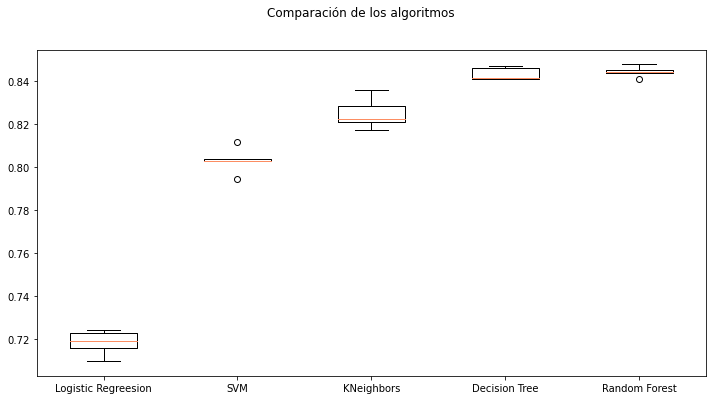

In [36]:
# Gráfica de caja para verificar el rendimiento de los diferentes modelos probados 
fig14 = plt.figure(figsize =(12,6))
fig14.suptitle('Comparación de los algoritmos')
ax = fig14.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Hiperparametrización de los mejores modelos

In [37]:
# Búsqueda de los mejores parámetros para "K-Neighbors"
parameters1 = {"n_neighbors" : [11,13,15],
              "weights": ["uniform", "distance", None],
              "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
              }

model_KNN = KNeighborsClassifier()
kFold = KFold(n_splits=5, random_state=3, shuffle=True)

grid = GridSearchCV(estimator=model_KNN, param_grid=parameters1, cv=kFold, return_train_score=True)
grid_result1= grid.fit(X_train, y_train)

# mejores parámetros
grid_result1.best_params_

{'algorithm': 'auto', 'n_neighbors': 13, 'weights': 'distance'}

In [38]:
# Búsqueda de los mejores parámetros para "Árboles de decisión"
parameters2 = {"max_depth": [1, 2, 3, None],
              "splitter": ["best", "random"],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_DTC = DecisionTreeClassifier()
kFold = KFold(n_splits=5, random_state=3, shuffle=True)

grid2 = GridSearchCV(estimator=model_DTC, param_grid=parameters2, cv=kFold, return_train_score=True)
grid_result2= grid2.fit(X_train, y_train)

# mejores parámetros
grid_result2.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 3,
 'splitter': 'random'}

In [39]:
# Búsqueda de los mejores parámetros para "Bosques aleatorios"
parameters3 = {"max_depth": [1, 2, 3, None],
              "max_features": [1, 2, 3, "sqrt", "log2"],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy", "log_loss"]
              }

model_RFC = RandomForestClassifier()
kFold = KFold(n_splits=5, random_state=3, shuffle=True)

grid3 = GridSearchCV(estimator=model_RFC, param_grid=parameters3, cv=kFold, return_train_score=True)
grid_result3= grid3.fit(X_train, y_train)

# mejores parámetros
grid_result3.best_params_

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 3}

## Evaluación del mejor modelo

In [40]:
# Comparación de modelos con los resultados de la búsqueda de los mejores parámetros 
models_hiper = []
models_hiper.append(['KNeighbors', KNeighborsClassifier(**grid_result1.best_params_)])
models_hiper.append(['Decision Tree', DecisionTreeClassifier(**grid_result2.best_params_)])
models_hiper.append(['Random Forest', RandomForestClassifier(**grid_result3.best_params_)])

# Evaluación de los diferentes modelos
results2 = []
names2 = []
scoring2 = 'accuracy'
for name, model in models_hiper:
    kFold = KFold(n_splits=5, random_state=3, shuffle=True)
    cv_results2 = cross_val_score(model, X_train, y_train, cv=kFold, scoring=scoring2)
    results2.append(cv_results2)
    names2.append(name)
    print(f"{name}: {cv_results2.mean()*100.0:,.2f}% ({cv_results2.std()*100.0:,.2f}%)")

KNeighbors: 84.01% (0.45%)
Decision Tree: 84.33% (0.33%)
Random Forest: 84.54% (0.23%)


In [41]:
# Entrenamiento y prueba con el mejor modelo 
# Inicializamos el modelo 
mejor_modelo = RandomForestClassifier(**grid_result3.best_params_)
# Le pasamos los datos de entrenamiento 
mejor_modelo.fit(X_train,y_train)

# Realizamos una nueva predición con los datos de prueba
y_pred = mejor_modelo.predict(X_val)

# Evaluamos el rendimiento del modelo con los datos de prueba 
accuracy_score(y_val, y_pred)

0.84272

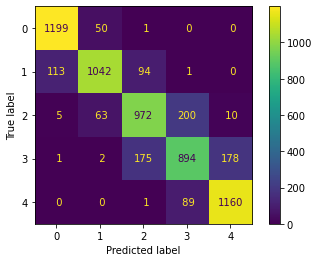

In [42]:
# Resultados de la matriz de confusión con los datos de prueba 
plot_confusion_matrix(mejor_modelo, X_val, y_val, values_format='3g')

In [43]:
# Reporte de los resultados que se obtuvieron con los datos de prueba 
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1250
           1       0.90      0.83      0.87      1250
           2       0.78      0.78      0.78      1250
           3       0.76      0.72      0.73      1250
           4       0.86      0.93      0.89      1250

    accuracy                           0.84      6250
   macro avg       0.84      0.84      0.84      6250
weighted avg       0.84      0.84      0.84      6250



In [44]:
# Realizamos una nueva predición con los datos de test
y_pred2 = mejor_modelo.predict(X_test)

# Evaluamos el rendimiento del modelo con los datos de test
accuracy_score(y_test, y_pred2)

0.83936

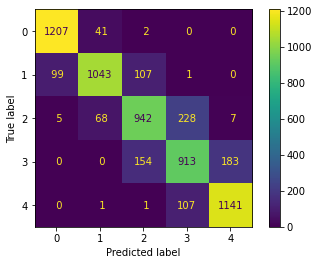

In [45]:
# Resultados de la matriz de confusión con los datos de test
plot_confusion_matrix(mejor_modelo, X_test, y_test, values_format='3g')

In [46]:
# Reporte de los resultados que se obtuvieron con los datos de test
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1250
           1       0.90      0.83      0.87      1250
           2       0.78      0.75      0.77      1250
           3       0.73      0.73      0.73      1250
           4       0.86      0.91      0.88      1250

    accuracy                           0.84      6250
   macro avg       0.84      0.84      0.84      6250
weighted avg       0.84      0.84      0.84      6250



## Evaluación del modelo final con el conjunto de pruebas 

In [47]:
# Lectura del dataset 
data2 = pd.read_json('https://challenges-asset-files.s3.us-east-2.amazonaws.com/Events/Danone+Hackathon+Mexico/data/test_products.json', orient='index')
# Visualización inicial del conjunto de datos
data2.head(5)

,name,brand,generic_name,categories_hierarchy,is_beverage,selling_countries,ingredient_origins,ingredients,additives_count,calcium_100g,...,sugars_100g,nutrition_grade,packaging_materials,non_recyclable_and_non_biodegradable_materials_count,est_co2_agriculture,est_co2_consumption,est_co2_distribution,est_co2_packaging,est_co2_processing,est_co2_transportation
0,Activia saveur coco x 4,"Danone,Activia",unknown,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:belgium, en:france]","{'en:european-union': 50, 'en:france': 50}","[{'id': 'en:whole-milk', 'percent_estimate': '...",0,unknown,...,13.1,b,[en:plastic],1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,Danup peche melba,Danone,unknown,"[en:plant-based-foods-and-beverages, en:bevera...",1,[en:tunisia],{'en:unknown': 100},unknown,unknown,unknown,...,unknown,unknown,[en:unknown],1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,Off-the-charts cherry pie flavor not-so-tradit...,"Oikos,Danone",,"[en:dairies, en:fermented-foods, en:desserts, ...",0,"[en:france, en:united-states]",{'en:unknown': 100},"[{'has_sub_ingredients': 'yes', 'id': 'en:yogu...",1,0.067,...,10.67,b,[en:plastic],1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,Yaourt brassé nature,Danone,,"[en:dairies, en:fermented-foods, en:desserts, ...",0,[en:france],{'en:france': 100},"[{'id': 'en:whole-milk', 'origins': 'en:france...",0,0.149,...,5.7,b,[en:plastic],1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,Activia yaourt à boire myrtille,"Danone,Activia",unknown,"[en:beverages, en:dairies, en:fermented-foods,...",1,[en:poland],{'en:unknown': 100},"[{'id': 'en:skimmed-milk', 'percent_estimate':...",0,0.105,...,0.2,d,"[en:hdpe-high-density-polyethylene, en:ldpe-lo...",0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002


In [48]:
# Eliminación de datos que son irrelevantes y que podrian afectar el resultado.
df = data2.drop(['name','brand','generic_name','additives_count','nutrition_grade','categories_hierarchy','selling_countries',
                'ingredient_origins','ingredients','packaging_materials', 'calcium_100g',
                'carbohydrates_100g', 'energy_kcal_100g','fat_100g','fiber_100g',
                'proteins_100g','salt_100g','sodium_100g','sugars_100g'], axis=1)

In [49]:
# Renombramos cada columna
df.rename(columns={'is_beverage':'Es_Bebida','non_recyclable_and_non_biodegradable_materials_count':'Tipo_Material',
                          'est_co2_agriculture':'Co2_Agricultura','est_co2_consumption':'Co2_Consumo',
                          'est_co2_distribution':'Co2_Distribución','est_co2_packaging':'Co2_Empaquetado',
                          'est_co2_processing':'Co2_Procesamiento','est_co2_transportation':'Co2_Transporte'}, inplace=True)
# Visualizamos los cambios aplicados
df

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,0,1,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,1,1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,0,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,0,1,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,1,0,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002
...,...,...,...,...,...,...,...,...
1267,0,1,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
1268,1,1,1.121355,0.006688,0.035574,0.148287,0.011249,0.205154
1269,0,1,0.868335,0.006688,0.035574,0.180553,0.168338,0.201667
1270,0,1,4.456254,0.006688,0.035574,0.262661,0.262596,0.211504


In [50]:
# Separamos las columnas numéricas para escalarlas
colum_scal2 = df[["Co2_Agricultura","Co2_Consumo","Co2_Distribución","Co2_Empaquetado","Co2_Procesamiento","Co2_Transporte"]]
# Visualizamos los cambios aplicados
colum_scal2

,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,0.868335,0.006688,0.035574,0.177032,0.168338,0.201667
1,0.091307,0.006688,0.035436,0.177799,0.059533,0.190374
2,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
3,1.545345,0.006688,0.035574,0.180553,0.150069,0.201779
4,1.046470,0.006688,0.037393,0.184222,0.163641,0.234002
...,...,...,...,...,...,...
1267,1.530274,0.006688,0.035574,0.180553,0.148688,0.236482
1268,1.121355,0.006688,0.035574,0.148287,0.011249,0.205154
1269,0.868335,0.006688,0.035574,0.180553,0.168338,0.201667
1270,4.456254,0.006688,0.035574,0.262661,0.262596,0.211504


In [51]:
# Seleccionamos los datos que serán transformados
variables = pd.DataFrame(colum_scal2)
# Inicializamos el método de transformación
pt = PowerTransformer(method='yeo-johnson', standardize=True)
# Pasamos las varibles que serán transformadas
skl_yeojohnson = pt.fit(variables)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(variables)
# Transformamos a un DataFrame de Pandas
X_transform2 = pd.DataFrame(skl_yeojohnson, columns=colum_scal2.columns, index=colum_scal2.index)
# Visualizamos los cambios aplicados
X_transform2

,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,-0.717005,0.113029,0.053312,-0.206671,-0.015891,-0.538731
1,-3.016847,0.113029,0.023256,-0.175910,-1.487376,-0.922703
2,0.399625,0.113029,0.053312,-0.065986,-0.224330,0.537904
3,0.420316,0.113029,0.053312,-0.065986,-0.208997,-0.535035
4,-0.369017,0.113029,0.459399,0.078965,-0.063870,0.466197
...,...,...,...,...,...,...
1267,0.399625,0.113029,0.053312,-0.065986,-0.224330,0.537904
1268,-0.234748,0.113029,0.053312,-1.415436,-2.473430,-0.423803
1269,-0.717005,0.113029,0.053312,-0.065986,-0.015891,-0.538731
1270,2.745960,0.113029,0.053312,2.819640,0.748136,-0.218745


In [52]:
# Pasar las características transformadas al dataset original
df2 = df.drop(["Co2_Agricultura","Co2_Consumo","Co2_Distribución","Co2_Empaquetado","Co2_Procesamiento","Co2_Transporte"], axis=1)
# Visualizamos los cambios aplicados
df2

,Es_Bebida,Tipo_Material
0,0,1
1,1,1
2,0,1
3,0,1
4,1,0
...,...,...
1267,0,1
1268,1,1
1269,0,1
1270,0,1


In [53]:
# Concatenamos los nuevos datasets
df3 = pd.concat([df2, X_transform2], axis=1,sort=True)
# Visualizamos los cambios aplicados
df3 

,Es_Bebida,Tipo_Material,Co2_Agricultura,Co2_Consumo,Co2_Distribución,Co2_Empaquetado,Co2_Procesamiento,Co2_Transporte
0,0,1,-0.717005,0.113029,0.053312,-0.206671,-0.015891,-0.538731
1,1,1,-3.016847,0.113029,0.023256,-0.175910,-1.487376,-0.922703
2,0,1,0.399625,0.113029,0.053312,-0.065986,-0.224330,0.537904
3,0,1,0.420316,0.113029,0.053312,-0.065986,-0.208997,-0.535035
4,1,0,-0.369017,0.113029,0.459399,0.078965,-0.063870,0.466197
...,...,...,...,...,...,...,...,...
1267,0,1,0.399625,0.113029,0.053312,-0.065986,-0.224330,0.537904
1268,1,1,-0.234748,0.113029,0.053312,-1.415436,-2.473430,-0.423803
1269,0,1,-0.717005,0.113029,0.053312,-0.065986,-0.015891,-0.538731
1270,0,1,2.745960,0.113029,0.053312,2.819640,0.748136,-0.218745


In [54]:
# Realizamos una nueva predición con los datos de prueba
y_pred_prueba = mejor_modelo.predict(df3)

In [55]:
# Guardamos los resultados de las predicciones
pd.DataFrame(y_pred_prueba, columns=['target']).to_json("predictions.json")